# Doble Péndulo acoplado a un Resorte

$$ m \dfrac{d²}{dx²} x_1 = -\dfrac{mg}{l}x_1 - k(x_1-x_2) $$

$$ m \dfrac{d²}{dx²} x_2 = -\dfrac{mg}{l}x_2 - k(x_2-x_1) $$ 

In [20]:
import sympy as sp 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [49]:
m, g, l, k = sp.symbols('m, g, l, k',positive=True)

t = sp.symbols('t',real = True)
x1 = sp.Function('x_1', real = True)(t)
x2 = sp.Function('x_2', real = True)(t)
v = sp.Function('v', real = True)(t)
u = sp.Function('u', real = True)(t)

In [54]:
eq1 = sp.Eq(v,sp.diff(x_1,t))
eq2 = sp.Eq(u,sp.diff(x_2,t))
eq3 = sp.Eq(m*sp.diff(v,t) + (m*g/l)*x_1 - k*(x_1-x_2),0)
eq4 = sp.Eq(m*sp.diff(u,t) + (m*g/l)*x_2 - k*(x_2-x_1),0)
eqs = [eq1,eq2,eq3,eq4]

In [55]:
x10 = sp.symbols('x_0^1')
x20 = sp.symbols('x_0^2')
v0 = sp.symbols('v_0')
u0 = sp.symbols('u_0')

CI = {x_1.subs(t, 0): x10,  x_2.subs(t, 0): x20, v.subs(t, 0): v0, u.subs(t, 0): u0}

In [56]:
sol_sys = sp.dsolve(eqs,[x_1,x_2,v,u], ics=CI)
sol_x1, sol_x2,sol_x1dot, sol_x2dot = sol_sys

In [57]:
sol_x1

Eq(x_1(t), C2*sqrt(l)*sin(t*sqrt(g*m + 2*k*l)/sqrt(l))/sqrt(g*m + 2*k*l) - I*sqrt(l)*(-C2 + u_0/2 - v_0/2)*exp(t*sqrt(-g*m - 2*k*l)/sqrt(l))/sqrt(g*m + 2*k*l) + (x_0^1 + x_0^2)*cos(sqrt(g)*sqrt(m)*t/sqrt(l))/2 - I*(2*sqrt(l)*v_0 + sqrt(l)*(2*C2 - u_0 - v_0) + x_0^1*sqrt(-g*m - 2*k*l) - x_0^2*sqrt(-g*m - 2*k*l))*cos(t*sqrt(g*m + 2*k*l)/sqrt(l))/(2*sqrt(g*m + 2*k*l)) - sqrt(l)*(u_0/2 + v_0/2)*sin(sqrt(g)*sqrt(m)*t/sqrt(l))/(sqrt(g)*sqrt(m)))

In [7]:
m_num = 1.0
g_num = 9.81
l_num = 1.5
k_num = 100.0
x10_num = 0.0
x10dot_num = 2.0
x20_num = 0.0
x20dot_num = 0.0

In [39]:
x1_num = sp.lambdify(t, sol_x1.subs([(x10, x10_num),(v0, x10dot_num), 
                                     (x20, x20_num), (u0, x20dot_num)]).rhs, 'numpy')
x2_num = sp.lambdify(t, sol_x2.subs([(x10, x10_num),(v0, x10dot_num), 
                                     (x20, x20_num), (u0, x20dot_num)]).rhs, 'numpy')

In [44]:
t_plot = np.linspace(0,15,1000)

x1_plot = x1_num(t_plot)
x2_plot = x2_num(t_plot)

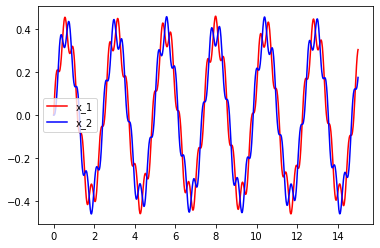

In [45]:
plt.plot(t_plot,x1_plot,c='r')
plt.plot(t_plot,x2_plot,c='b')
plt.legend(['x_1','x_2'])
plt.show()